# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='daily_summary_san'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
station,string,Station code
name,string,Station name
latitude,number,Station lattitude
longitude,number,Station longitude
elevation,number,Station elevation
date,date,Measurement date
awnd,number,Average daily wind speed (meters per second or miles per hour as per user preference
dapr,string,Number of days included in the multiday precipitation total (MDPR)
fmtm,integer,"Time of fastest mile or fastest 1-minute wind (hours and minutes, i.e., HHMM)"
mdpr,string,"Multiday precipitation total (mm or inches as per user preference; use with DAPR and DWPR, if available)"


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,station,name,latitude,longitude,elevation,date,awnd,dapr,fmtm,mdpr,...,wt07,wt08,wt09,wt10,wt11,wt13,wt14,wt16,wt21,wv01
0,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",32.7336,-117.1831,4.6,1998-01-01,4.03,NaN,2125.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",32.7336,-117.1831,4.6,1998-01-02,6.04,NaN,1233.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",32.7336,-117.1831,4.6,1998-01-03,5.82,NaN,1310.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",32.7336,-117.1831,4.6,1998-01-04,4.92,NaN,1612.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",32.7336,-117.1831,4.6,1998-01-05,4.25,NaN,1428.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [27]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,20
datetime,1
number,18
other,2


# Constant Columns

These "constant columns" arent really constant, it's just that they have inconbsistent used of NaN  or 0 for "false".  For these columns, we should fillna with 0. 


In [28]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0,1,4,9,10,16,21,33,43,86,...,28189,28258,28456,28800,28933,29574,29727,29803,29807,31593
snow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
snwd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tsun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wesd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wesf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt01,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,...,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN
wt02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
wt03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
wt04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39500 entries, 0 to 39499
Data columns (total 1 columns):
date    39500 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 308.7 KB


None

,count,unique,top,freq,first,last
date,39500,7529,2015-06-23 00:00:00,11,1998-01-01 00:00:00,2018-08-12 00:00:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39500 entries, 0 to 39499
Data columns (total 18 columns):
latitude     39500 non-null float64
longitude    39500 non-null float64
elevation    39500 non-null float64
awnd         20028 non-null float64
dapr         3 non-null float64
fmtm         7900 non-null float64
mdpr         13 non-null float64
pgtm         15702 non-null float64
prcp         39207 non-null float64
tavg         7235 non-null float64
tmax         26278 non-null float64
tmin         26275 non-null float64
wdf2         18803 non-null float64
wdf5         18608 non-null float64
wdfg         1798 non-null float64
wsf2         18803 non-null float64
wsf5         18609 non-null float64
wsfg         1798 non-null float64
dtypes: float64(18)
memory usage: 5.4 MB


None

,count,mean,std,min,25%,50%,75%,max
latitude,39500.0,32.754650,0.105259,32.57222,32.7336,32.7672,32.8428,32.95570
longitude,39500.0,-117.142596,0.092383,-117.24560,-117.2258,-117.1831,-117.0586,-116.97944
elevation,39500.0,77.942959,63.871576,4.60000,4.6000,86.6000,145.4000,157.00000
awnd,20028.0,5.440911,1.859256,0.45000,4.2500,5.1400,6.2600,19.69000
dapr,3.0,8.666667,9.073772,2.00000,3.5000,5.0000,12.0000,19.00000
fmtm,7900.0,1449.146203,796.741504,0.00000,1257.0000,1411.5000,1521.0000,9999.00000
mdpr,13.0,0.172308,0.262683,0.01000,0.0100,0.0300,0.1600,0.79000
pgtm,15702.0,1379.372691,383.134865,0.00000,1230.0000,1357.0000,1521.0000,2359.00000
prcp,39207.0,0.026676,0.144287,0.00000,0.0000,0.0000,0.0000,3.85000
tavg,7235.0,63.522875,6.516721,0.00000,59.0000,64.0000,68.0000,87.00000


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


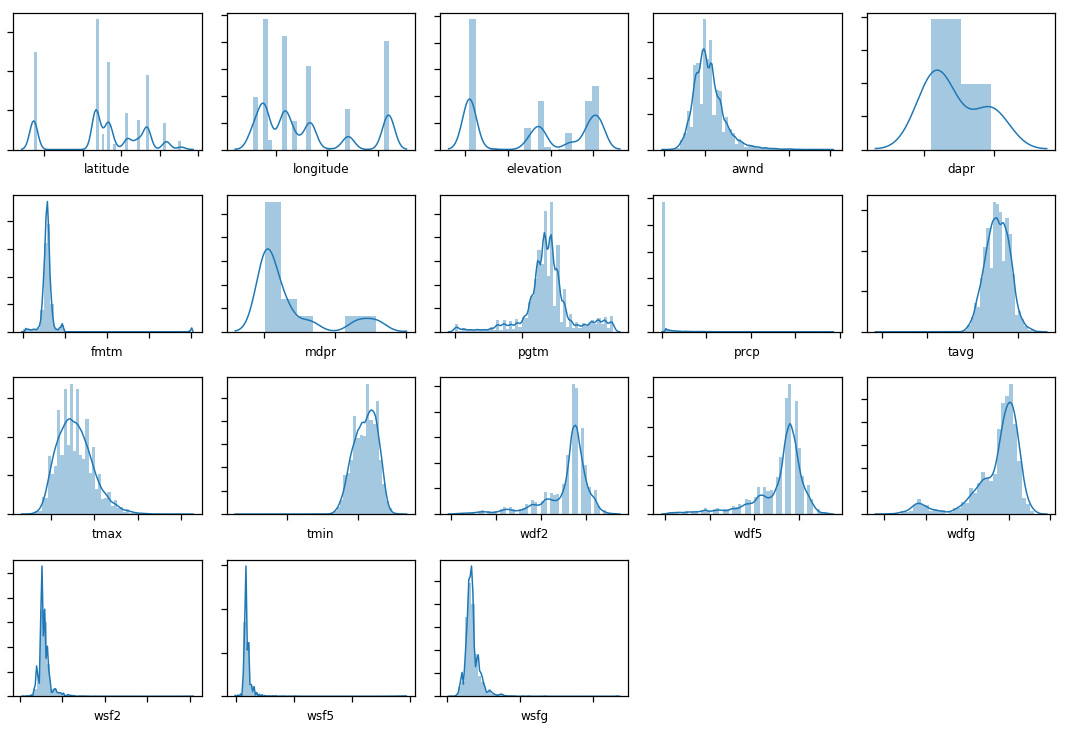

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

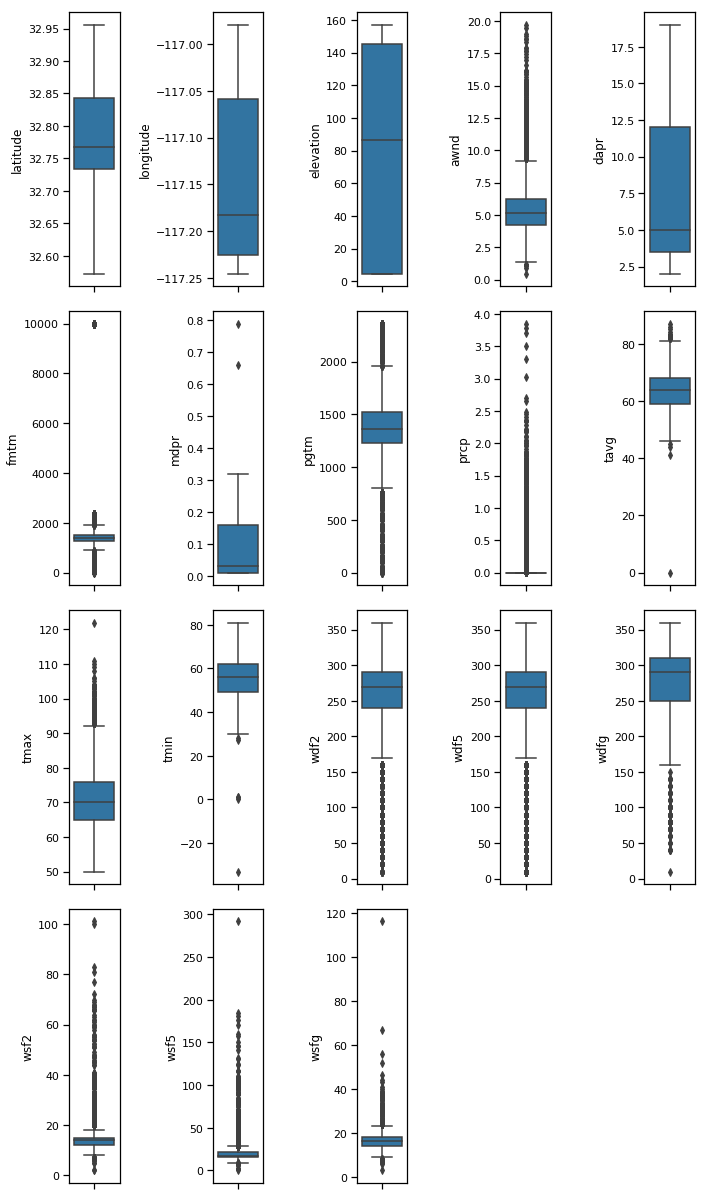

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

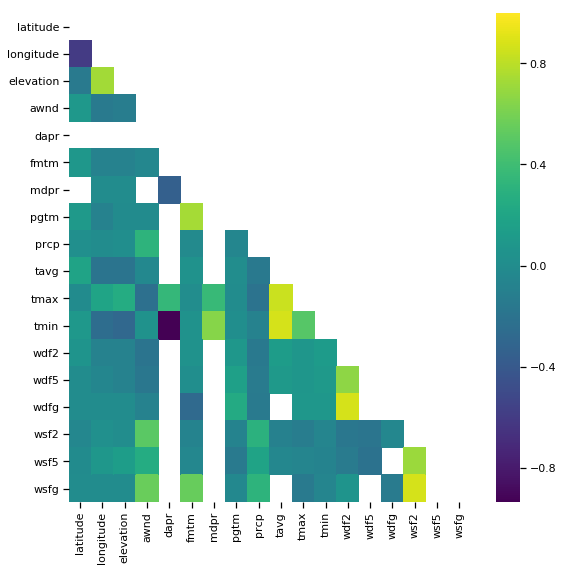

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39500 entries, 0 to 39499
Data columns (total 2 columns):
station    39500 non-null object
name       39500 non-null object
dtypes: object(2)
memory usage: 617.3+ KB


None

,count,unique,top,freq
station,39500,13,USW00023188,7529
name,39500,13,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",7529


# Nulls


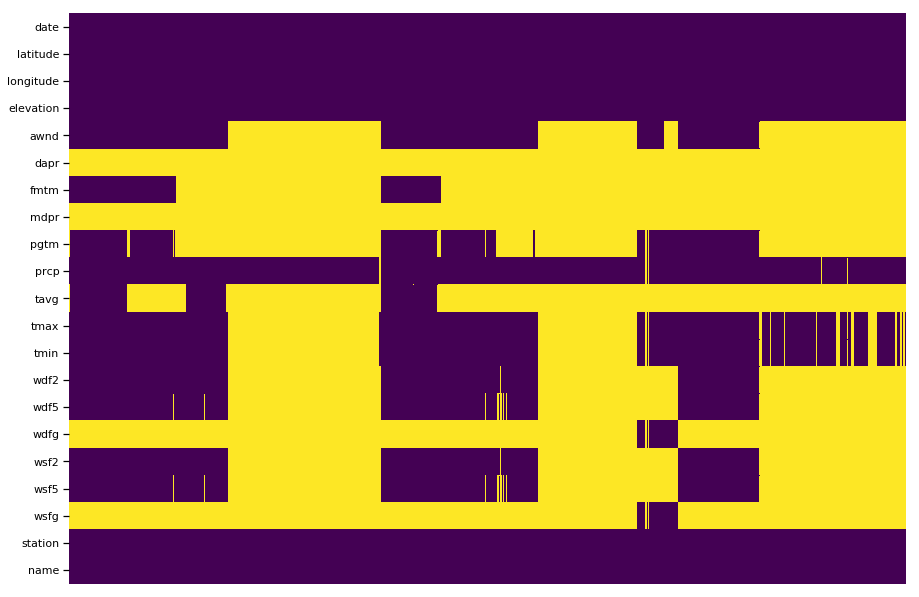

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )

Nulls in TMAX by station

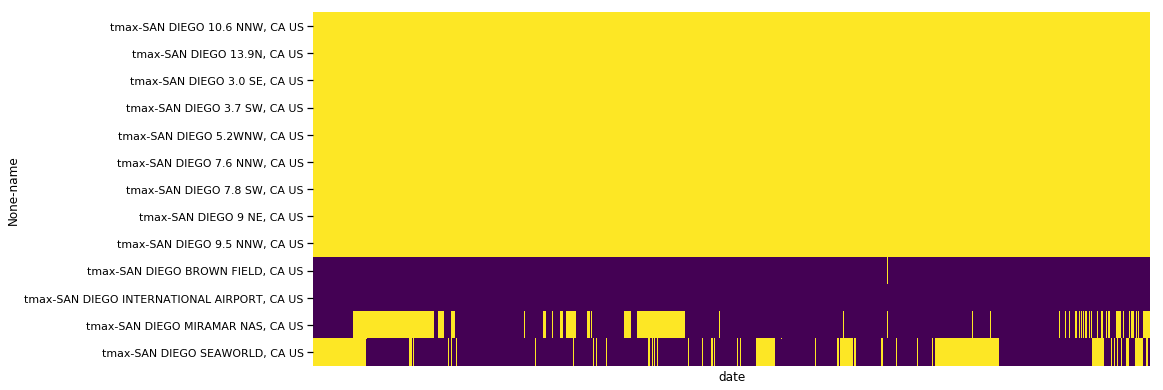

In [39]:
_1 = df[['tmax','date','name']].set_index(['name','date']).unstack(0)

fig, ax = plt.subplots(figsize=(15,.5*len(_1.columns)))
sns.heatmap(_1.isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )


In [71]:
df.set_index('station').isnull().stack().reset_index().groupby(['station','level_1'])\
    .sum().reset_index().sort_values(0,ascending=False).head()
    

,station,level_1,0
461,USW00023188,wesf,7529.0
441,USW00023188,dapr,7529.0
459,USW00023188,wdfg,7529.0
447,USW00023188,mdpr,7529.0
464,USW00023188,wsfg,7529.0


In [78]:
df.set_index('station').isnull().groupby(df.index).sum()

,name,latitude,longitude,elevation,date,awnd,dapr,fmtm,mdpr,pgtm,...,wt07,wt08,wt09,wt10,wt11,wt13,wt14,wt16,wt21,wv01
0,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,False,True,True,True,True
1,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,False,True,False,True,True
2,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,False,True,False,True,True
3,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,False,True,False,True,True
4,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
5,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
6,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
7,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,False,True,True,True,True
8,False,False,False,False,False,False,True,False,True,True,...,True,True,True,True,True,False,True,False,True,True
9,False,False,False,False,False,False,True,False,True,True,...,True,False,True,True,True,False,True,False,True,True
